In [1]:
# Load the "SpecObjv27" sky survey catalog

SpecObjv27_raw = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/GAMA/SpecCat/SpecObjMerged/SpectObjgkvInputMerged')[1].data
print('SpecObjv27_raw file is opened')



# Apply selection criteria : "SpecObjv27"
SpecObjv27 =  (SpecObjv27_raw['NQ'] > 2)

num_of_SpecObj = SpecObjv27.sum()
print('number of the objects in "SpecObjv27" have NQ > 2: ', num_of_SpecObj)


NameError: name 'fits' is not defined

In [230]:

# Create masks for each survey
SDSS_mask = (SpecObjv27_raw['SURVEY_CODE'] == 1) & SpecObjv27
GAMA_mask = (SpecObjv27_raw['SURVEY_CODE'] == 5) & SpecObjv27


# Use the masks to get objects from each survey
SDSS = SpecObjv27_raw[SDSS_mask]
GAMA = SpecObjv27_raw[GAMA_mask]

# Print the number of objects from each survey
print(f"Number of objects from SDSS (QN>2): {len(SDSS)}")
print(f"Number of objects from GAMA (QN>2): {len(GAMA)}")


Number of objects from SDSS (QN>2): 57625
Number of objects from GAMA (QN>2): 248682


In [231]:
# Define region limits
regions_SpecObj = {
    'G02': {'RA': (30.20, 38.80), 'DEC': (-10.25, -3.72)},
    'G09': {'RA': (129.0, 141.0), 'DEC': (-2.0, 3.0)},
    'G12': {'RA': (174.0, 176.0), 'DEC': (-3.0, 2.0)},
    'G15': {'RA': (211.5, 223.5), 'DEC': (-2.0, 3.0)},
    'G23': {'RA': (339.0, 351.0), 'DEC': (-35.0, -30.0)},
}


# Create masks for each region in SpecObjv27
region_masks_SpecObj = {}
for region, limits in regions_SpecObj.items():
    ra_mask_SpecObj = (SpecObjv27_raw['RA'] >= limits['RA'][0]) & (SpecObjv27_raw['RA'] <= limits['RA'][1])
    dec_mask_SpecObj = (SpecObjv27_raw['DEC'] >= limits['DEC'][0]) & (SpecObjv27_raw['DEC'] <= limits['DEC'][1])
    combined_mask_SpecObj = ra_mask_SpecObj & dec_mask_SpecObj & SpecObjv27
    region_masks_SpecObj[region] = combined_mask_SpecObj

    # Print the number of objects meeting the criteria in each region for SpecObjv27
    print(f'Number of objects in SpecObjv27 {region}: {combined_mask_SpecObj.sum()}')

# Print the total number of objects in all regions for SpecObjv27
total_objects_in_all_regions_SpecObj = sum(mask.sum() for mask in region_masks_SpecObj.values())
print("Total number of objects 'SpecObjv27' in all regions:", total_objects_in_all_regions_SpecObj)



Number of objects in SpecObjv27 G02: 34476
Number of objects in SpecObjv27 G09: 70473
Number of objects in SpecObjv27 G12: 12001
Number of objects in SpecObjv27 G15: 76316
Number of objects in SpecObjv27 G23: 49585
Total number of objects 'SpecObjv27' in all regions: 242851


In [232]:
# Determine the number of objects in each region from SDSS and GAMA surveys
SDSS_counts = {}
GAMA_counts = {}

for region, mask in region_masks_SpecObj.items():
    SDSS_counts[region] = (mask & SDSS_mask).sum()
    GAMA_counts[region] = (mask & GAMA_mask).sum()

    # Print the number of objects from each survey in each region
    print(f"Number of SDSS (NQ>2) objects in {region}: {SDSS_counts[region]}")
    print(f"Number of GAMA (NQ>2) objects in {region}: {GAMA_counts[region]}")


Number of SDSS (NQ>2) objects in G02: 5384
Number of GAMA (NQ>2) objects in G02: 28910
Number of SDSS (NQ>2) objects in G09: 10335
Number of GAMA (NQ>2) objects in G09: 59089
Number of SDSS (NQ>2) objects in G12: 2417
Number of GAMA (NQ>2) objects in G12: 8937
Number of SDSS (NQ>2) objects in G15: 15158
Number of GAMA (NQ>2) objects in G15: 56509
Number of SDSS (NQ>2) objects in G23: 0
Number of GAMA (NQ>2) objects in G23: 43405


In [233]:
# MS region
MS_mask = region_masks_SpecObj['G09'] | region_masks_SpecObj['G12'] | region_masks_SpecObj['G15'] | region_masks_SpecObj['G23']

# equatorial region
equatorial_mask = region_masks_SpecObj['G09'] | region_masks_SpecObj['G12'] | region_masks_SpecObj['G15']

# All the data from GAMA survey (NQ>2)
GAMA_ALL = SpecObjv27_raw[GAMA_mask & SpecObjv27]

# GAMA objects in G09+G12+G15+G23 regions = GAMA_MS, (NQ>2)
GAMA_MS = SpecObjv27_raw[GAMA_mask & MS_mask & SpecObjv27]

# SDSS objects in G09+G12+G15+G23 regions, (NQ>2)
SDSS_MS_mask = MS_mask 
SDSS_MS = SpecObjv27_raw[SDSS_mask & SDSS_MS_mask & SpecObjv27]
    
# SDSS objects in G09+G12+G15 regions
SDSS_equatorial = SpecObjv27_raw[SDSS_mask & equatorial_mask & SpecObjv27]

# GAMA objects in G09+G12+G15 regions
GAMA_equatorial_mask = equatorial_mask  # Reusing the same mask since regions are identical
GAMA_equatorial = SpecObjv27_raw[GAMA_mask & equatorial_mask & SpecObjv27]

# Print the number of objects in each basket
print(f"Number of objects in GAMA_ALL: {len(GAMA_ALL)}")
print(f"Number of objects in GAMA_MS: {len(GAMA_MS)}")
print(f"Number of objects in SDSS_MS: {len(SDSS_MS)}")
print(f"Number of objects in SDSS_equatorial: {len(SDSS_equatorial)}")
print(f"Number of objects in GAMA_equatorial: {len(GAMA_equatorial)}")


Number of objects in GAMA_ALL: 248682
Number of objects in GAMA_MS: 167940
Number of objects in SDSS_MS: 27910
Number of objects in SDSS_equatorial: 27910
Number of objects in GAMA_equatorial: 124535


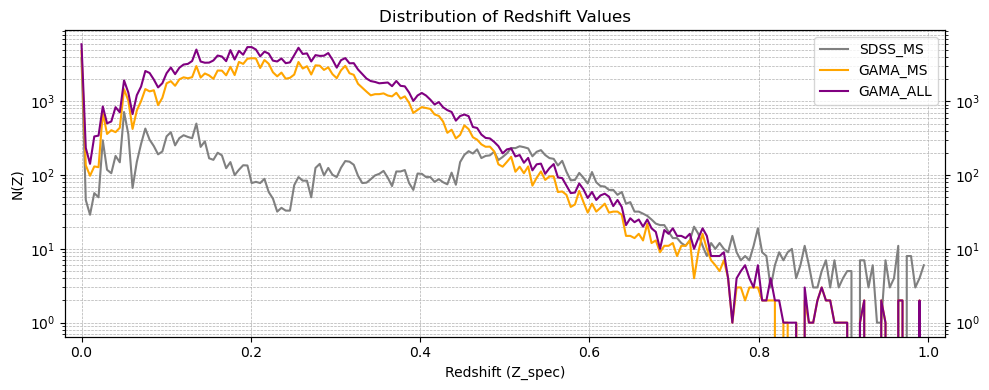

In [242]:
import matplotlib.pyplot as plt

# Extract the redshift values, all of these meet NQ>2
Z_SDSS_MS = SDSS_MS['Z']
Z_GAMA_MS = GAMA_MS['Z']
Z_GAMA_ALL = GAMA_ALL['Z']

# Define bins and range
bins = np.linspace(0,1, 200)

# Calculate histograms
hist_SDSS_MS, edges_SDSS_MS = np.histogram(Z_SDSS_MS, bins=bins, range=(0, 1))
hist_GAMA_MS, edges_GAMA_MS = np.histogram(Z_GAMA_MS, bins=bins, range=(0, 1))
hist_GAMA_ALL, edges_GAMA_ALL = np.histogram(Z_GAMA_ALL, bins=bins, range=(0, 1))

# Plot histograms as lines
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(edges_SDSS_MS[:-1], hist_SDSS_MS, color='gray', label='SDSS_MS')
ax.plot(edges_GAMA_MS[:-1], hist_GAMA_MS, color='orange', label='GAMA_MS')
ax.plot(edges_GAMA_ALL[:-1], hist_GAMA_ALL, color='purple', label='GAMA_ALL')

ax.set_xlabel('Redshift (Z_spec)')
ax.set_ylabel('N(Z)')
ax.set_title('Distribution of Redshift Values')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_yscale('log')
ax.set_xlim(-0.02, 1.02)

# Create a twin y-axis
ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_ylim(ax.get_ylim())

plt.tight_layout()
plt.show()
